In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
# Read in the csv file containing the training data
df = pd.read_csv('TrainingSet.csv', header=0)
df = df.drop('Unnamed: 0', axis=1) # drop the first column
df.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [3]:
# Need to get a list of unique countries
countries = pd.unique(df['Country Name'])
print('There are ' + str(len(countries)) + ' countries in this dataset.')

There are 214 countries in this dataset.


In [4]:
# There should be the same number of series names as series codes.

# Need to get a list of unique series codes
seriesCodes = pd.unique(df['Series Code'])

# Need to get a list of unique series names
seriesNames = pd.unique(df['Series Name'])

# Ensure that the number of codes and the number of names are the same -- every series name has a series code
assert len(seriesCodes) == len(seriesNames)

print('There are ' + str(len(seriesNames)) + ' series in this dataset.')

There are 1305 series in this dataset.


In [5]:
# Clean up the years
years = df.columns[:-3]
years = [x[:4] for x in years]

print('There are ' + str(len(years)) + ' years in this dataset.')

There are 36 years in this dataset.


In [6]:
# Reset the column names
new_columns = years.copy()
new_columns.extend(['Country Name', 'Series Code', 'Series Name'])
print(new_columns)
df.columns = new_columns

['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', 'Country Name', 'Series Code', 'Series Name']


In [7]:
df.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [8]:
# Change columns to rows and vice versa
melted_df = pd.melt(df, id_vars=['Series Code', 'Series Name', 'Country Name'], value_vars=years)

In [9]:
melted_df

,Series Code,Series Name,Country Name,variable,value
0,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,1972,NaN
1,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,1972,NaN
2,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,1972,NaN
3,allsi.gen_pop,(%) Generosity of All Social Insurance,Afghanistan,1972,NaN
4,allsp.gen_pop,(%) Generosity of All Social Protection,Afghanistan,1972,NaN
...,...,...,...,...,...
7034467,SG.VAW.BURN.ZS,Women who believe a husband is justified in be...,Zimbabwe,2007,NaN
7034468,SG.VAW.GOES.ZS,Women who believe a husband is justified in be...,Zimbabwe,2007,NaN
7034469,SG.VAW.NEGL.ZS,Women who believe a husband is justified in be...,Zimbabwe,2007,NaN
7034470,SG.VAW.REFU.ZS,Women who believe a husband is justified in be...,Zimbabwe,2007,NaN


In [10]:
# Let's check that our values match the original - zimbabwe 2007 for the final series should be 58.3 and it matches
df.loc[(df['Country Name'] == 'Zimbabwe') &
       (df['Series Code'] == 'SH.DYN.AIDS.FE.ZS') , '2007']

195401    58.3
Name: 2007, dtype: float64

In [11]:
# We have both a Series Name and Series Code as identifiers but only need one of them, so we drop the Series Code.
melted_df = melted_df.drop('Series Code', axis=1)
melted_df.columns = ['series', 'country', 'year', 'value']

In [12]:
melted_df.head()

,series,country,year,value
0,(%) Benefits held by 1st 20% population - All ...,Afghanistan,1972,NaN
1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,1972,NaN
2,(%) Benefits held by 1st 20% population - All ...,Afghanistan,1972,NaN
3,(%) Generosity of All Social Insurance,Afghanistan,1972,NaN
4,(%) Generosity of All Social Protection,Afghanistan,1972,NaN


In [13]:
# Now that we have years as rows, we need to set the Series Names to the columns
# the unstack() fuction helps us do that
unstacked_df = melted_df.set_index(['country', 'year', 'series'])['value'].unstack().reset_index()

In [14]:
unstacked_df

series,country,year,(%) Benefits held by 1st 20% population - All Social Insurance,(%) Benefits held by 1st 20% population - All Social Protection,(%) Benefits held by 1st 20% population - All Social Safety Nets,(%) Benefits held by 1st 20% population - Unemp benefits and ALMP,(%) Generosity of All Social Insurance,(%) Generosity of All Social Protection,(%) Generosity of All Social Safety Nets,(%) Generosity of Unemp benefits and ALMP,...,"Water pollution, wood industry (% of total BOD emissions)","Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,Zimbabwe,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5
7700,Zimbabwe,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.7
7701,Zimbabwe,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.9
7702,Zimbabwe,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.0,12.2,33.0,30.2,24.3,58.1


In [15]:
unstacked_df['year'] = unstacked_df['year'].astype(int)

In [16]:
# We want to choose a country that is not at the beginning or end of our dataset to ensure it appears as expected.
unstacked_df.loc[unstacked_df.country == 'France', :]

series,country,year,(%) Benefits held by 1st 20% population - All Social Insurance,(%) Benefits held by 1st 20% population - All Social Protection,(%) Benefits held by 1st 20% population - All Social Safety Nets,(%) Benefits held by 1st 20% population - Unemp benefits and ALMP,(%) Generosity of All Social Insurance,(%) Generosity of All Social Protection,(%) Generosity of All Social Safety Nets,(%) Generosity of Unemp benefits and ALMP,...,"Water pollution, wood industry (% of total BOD emissions)","Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women's share of population ages 15+ living with HIV (%)
2376,France,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2377,France,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2378,France,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2379,France,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2380,France,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2381,France,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2382,France,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2383,France,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384,France,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2385,France,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Determining the number of nulls for each series/column because there are a lot of NaNs appearing in the cell above
nulls = unstacked_df.isna().sum()[2:]
ranked_nulls = nulls.sort_values(ascending=True)
ranked_nulls

series
Adjusted savings: mineral depletion (current US$)                                             0
Adjusted savings: energy depletion (current US$)                                             15
Population (Total)                                                                           91
Population growth (annual %)                                                                 98
Urban population (% of total)                                                               180
                                                                                           ... 
(%) Benefits held by 1st 20% population - Unemp benefits and ALMP                          7696
(%) Generosity of Unemp benefits and ALMP                                                  7696
Net official flows from UN agencies, UNPBF (current US$)                                   7701
Firms with female top manager (% of firms)                                                 7702
Presence of peace keepers (number

In [18]:
# Let's get the initial number of columns of unstacked_df before we make any changes.
initial_df_length = len(unstacked_df.columns)

In [19]:
# If a column/series is missing more than half the data, we want to drop it as it will be difficult to predict
# with so much data missing.

# 214 countries * 36 years = 7704 rows
# 7704/2 = 3852 would be half the data points for a series


for column in unstacked_df:
    count_series = unstacked_df[column].isna().sum()
    if count_series > 3852:
        unstacked_df.drop(column, axis = 1, inplace = True)
        
print(str(initial_df_length-len(unstacked_df.columns)) + ' series were dropped from the original dataset. ' 
      + str(len(unstacked_df.columns)-2) + ' series remain.')

867 series were dropped from the original dataset. 438 series remain.


In [20]:
# Now let's see how many of the initial 1307 columns/series are at least half full
unstacked_df

series,country,year,Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Telephone lines (per 100 people),Terms of trade adjustment (constant LCU),Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)"
0,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,0.138399,2.257446e+06,...,NaN,NaN,4.516957,8.128965e+07,2.080285e+07,32.869081,1389151.0,11.9298,6.634620,0.0
1,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,0.145555,2.577942e+06,...,NaN,NaN,4.686652,1.262302e+08,2.161318e+07,27.692309,1481339.0,12.3792,6.425364,0.0
2,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,0.151152,3.328705e+06,...,NaN,NaN,7.149039,2.014564e+08,2.763836e+07,28.865980,1574530.0,12.8286,6.101041,0.0
3,Afghanistan,1975,NaN,NaN,NaN,NaN,NaN,NaN,0.169077,4.087907e+06,...,0.171290,NaN,7.568906,2.172609e+08,8.654791e+07,26.948358,1666627.0,13.2780,5.684501,0.0
4,Afghanistan,1976,NaN,NaN,NaN,NaN,NaN,NaN,0.156516,4.086801e+06,...,0.173345,NaN,7.103324,2.565056e+08,1.309186e+08,28.086957,1761884.0,13.7574,5.558187,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,Zimbabwe,2003,-18.597169,5.765983e+09,4.835208e+09,-18.803876,454.977986,381.533073,1.441396,7.938799e+07,...,2.374486,-3.442119e+08,5.261810,1.360920e+08,8.518754e+07,70.451989,4438019.0,35.0192,1.462004,316711000.0
7700,Zimbabwe,2004,-11.767952,5.087445e+09,4.730153e+09,-11.906587,400.805636,372.657002,1.396944,7.713997e+07,...,2.497430,-5.638541e+08,7.748060,2.342909e+08,2.232095e+08,76.039609,4498365.0,35.4396,1.350589,309048000.0
7701,Zimbabwe,2005,-7.101213,4.726174e+09,4.726174e+09,-7.229424,371.829698,371.829698,1.595803,8.745984e+07,...,2.580526,-6.867694e+08,7.489343,9.719159e+07,9.719159e+07,76.043707,4558017.0,35.8600,1.317366,125086000.0
7702,Zimbabwe,2006,-8.004865,4.347851e+09,4.305408e+09,-8.104052,341.696427,338.360898,1.707284,8.760166e+07,...,2.637165,-6.339028e+08,11.267126,1.545936e+08,1.545936e+08,82.820650,4620705.0,36.3140,1.365963,128124000.0


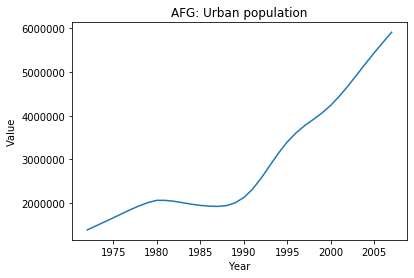

In [21]:
# Here is a sample plot to view Afghanistan's urban population
_ = plt.plot(unstacked_df[unstacked_df['country'] == 'Afghanistan']['year'], 
             unstacked_df[unstacked_df['country'] == 'Afghanistan']['Urban population'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Value')
_ = plt.title('AFG: Urban population')
plt.show()


In [22]:
# Let's see what our dataframe looks like for the first country in our dataset
unstacked_df[unstacked_df['country'] == 'Afghanistan']

series,country,year,Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Telephone lines (per 100 people),Terms of trade adjustment (constant LCU),Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)"
0,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,0.138399,2.257446e+06,...,NaN,NaN,4.516957,8.128965e+07,2.080285e+07,32.869081,1389151.0,11.9298,6.634620,0.0
1,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,0.145555,2.577942e+06,...,NaN,NaN,4.686652,1.262302e+08,2.161318e+07,27.692309,1481339.0,12.3792,6.425364,0.0
2,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,0.151152,3.328705e+06,...,NaN,NaN,7.149039,2.014564e+08,2.763836e+07,28.865980,1574530.0,12.8286,6.101041,0.0
3,Afghanistan,1975,NaN,NaN,NaN,NaN,NaN,NaN,0.169077,4.087907e+06,...,0.171290,NaN,7.568906,2.172609e+08,8.654791e+07,26.948358,1666627.0,13.2780,5.684501,0.0
4,Afghanistan,1976,NaN,NaN,NaN,NaN,NaN,NaN,0.156516,4.086801e+06,...,0.173345,NaN,7.103324,2.565056e+08,1.309186e+08,28.086957,1761884.0,13.7574,5.558187,0.0
5,Afghanistan,1977,NaN,NaN,NaN,NaN,NaN,NaN,0.175329,5.291039e+06,...,0.170318,NaN,6.683094,4.310389e+08,2.758209e+08,26.486080,1855690.0,14.2368,5.187290,0.0
6,Afghanistan,1978,NaN,NaN,NaN,NaN,NaN,NaN,0.153522,5.175389e+06,...,0.191673,NaN,6.736402,6.050290e+08,3.905550e+08,24.713804,1942479.0,14.7162,4.570840,0.0
7,Afghanistan,1979,NaN,NaN,NaN,NaN,NaN,NaN,0.155825,5.883546e+06,...,0.190841,NaN,7.901594,9.347790e+08,4.412110e+08,NaN,2014500.0,15.1956,3.640603,0.0
8,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,0.137298,5.102752e+06,...,0.195745,NaN,10.621110,9.400359e+08,3.711684e+08,NaN,2066033.0,15.6750,2.525932,0.0
9,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,0.179195,6.364148e+06,...,0.244527,NaN,10.522539,6.578809e+08,2.742934e+08,NaN,2064276.0,15.9234,-0.085078,0.0


In [24]:
# We see that some countries, such as Afghanistan are still missing a lot of data. Let's looked at the Series Names
# again, ranked by the number of nulls.
ranked_nulls

series
Adjusted savings: mineral depletion (current US$)                                             0
Adjusted savings: energy depletion (current US$)                                             15
Population (Total)                                                                           91
Population growth (annual %)                                                                 98
Urban population (% of total)                                                               180
                                                                                           ... 
(%) Benefits held by 1st 20% population - Unemp benefits and ALMP                          7696
(%) Generosity of Unemp benefits and ALMP                                                  7696
Net official flows from UN agencies, UNPBF (current US$)                                   7701
Firms with female top manager (% of firms)                                                 7702
Presence of peace keepers (number

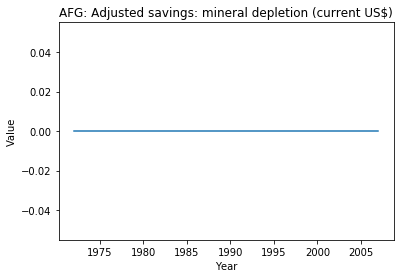

In [25]:
# In the cell above, we see only one column that isn't missing any data. Let's graph that series for Afghanistan. 
# Then, in the following cells, we will plot the second- and third-most populated series for our example country
# of Afghanistan.

# 1 Adjusted savings: mineral depletion (current US$)
_ = plt.plot(unstacked_df[unstacked_df['country'] == 'Afghanistan']['year'], 
             unstacked_df[unstacked_df['country'] == 'Afghanistan']['Adjusted savings: mineral depletion (current US$)'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Value')
_ = plt.title('AFG: Adjusted savings: mineral depletion (current US$)')
plt.show()

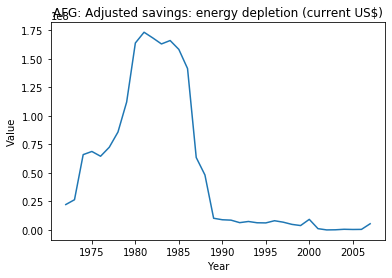

In [26]:
# 2 Adjusted savings: energy depletion (current US$)
_ = plt.plot(unstacked_df[unstacked_df['country'] == 'Afghanistan']['year'], 
             unstacked_df[unstacked_df['country'] == 'Afghanistan']['Adjusted savings: energy depletion (current US$)'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Value')
_ = plt.title('AFG: Adjusted savings: energy depletion (current US$)')
plt.show()

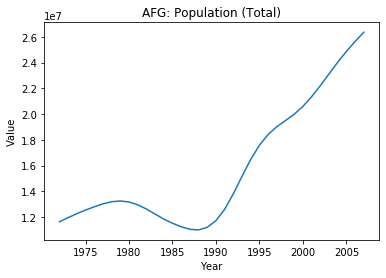

In [27]:
# 3 Population (Total)                                                                         
_ = plt.plot(unstacked_df[unstacked_df['country'] == 'Afghanistan']['year'], 
             unstacked_df[unstacked_df['country'] == 'Afghanistan']['Population (Total)'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Value')
_ = plt.title('AFG: Population (Total)')
plt.show()

In [28]:
unstacked_df

series,country,year,Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Telephone lines (per 100 people),Terms of trade adjustment (constant LCU),Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)"
0,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,0.138399,2.257446e+06,...,NaN,NaN,4.516957,8.128965e+07,2.080285e+07,32.869081,1389151.0,11.9298,6.634620,0.0
1,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,0.145555,2.577942e+06,...,NaN,NaN,4.686652,1.262302e+08,2.161318e+07,27.692309,1481339.0,12.3792,6.425364,0.0
2,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,0.151152,3.328705e+06,...,NaN,NaN,7.149039,2.014564e+08,2.763836e+07,28.865980,1574530.0,12.8286,6.101041,0.0
3,Afghanistan,1975,NaN,NaN,NaN,NaN,NaN,NaN,0.169077,4.087907e+06,...,0.171290,NaN,7.568906,2.172609e+08,8.654791e+07,26.948358,1666627.0,13.2780,5.684501,0.0
4,Afghanistan,1976,NaN,NaN,NaN,NaN,NaN,NaN,0.156516,4.086801e+06,...,0.173345,NaN,7.103324,2.565056e+08,1.309186e+08,28.086957,1761884.0,13.7574,5.558187,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,Zimbabwe,2003,-18.597169,5.765983e+09,4.835208e+09,-18.803876,454.977986,381.533073,1.441396,7.938799e+07,...,2.374486,-3.442119e+08,5.261810,1.360920e+08,8.518754e+07,70.451989,4438019.0,35.0192,1.462004,316711000.0
7700,Zimbabwe,2004,-11.767952,5.087445e+09,4.730153e+09,-11.906587,400.805636,372.657002,1.396944,7.713997e+07,...,2.497430,-5.638541e+08,7.748060,2.342909e+08,2.232095e+08,76.039609,4498365.0,35.4396,1.350589,309048000.0
7701,Zimbabwe,2005,-7.101213,4.726174e+09,4.726174e+09,-7.229424,371.829698,371.829698,1.595803,8.745984e+07,...,2.580526,-6.867694e+08,7.489343,9.719159e+07,9.719159e+07,76.043707,4558017.0,35.8600,1.317366,125086000.0
7702,Zimbabwe,2006,-8.004865,4.347851e+09,4.305408e+09,-8.104052,341.696427,338.360898,1.707284,8.760166e+07,...,2.637165,-6.339028e+08,11.267126,1.545936e+08,1.545936e+08,82.820650,4620705.0,36.3140,1.365963,128124000.0


In [29]:
# Let's see how many data points are missing for a series that we chose based on what was visible in the cell above.
df_tele_agg = unstacked_df.groupby("country").agg({"Telephone lines (per 100 people)": lambda x: x.isnull().sum()})
(df_tele_agg['Telephone lines (per 100 people)'] > 18).value_counts()

False    197
True      17
Name: Telephone lines (per 100 people), dtype: int64

In [30]:
# Here I decided to just look at the top 10 most populated series. Because I do not anticipate "Surface Area"
# or "Land Area" varying greatly from year-to-year for most countries, I have left these in the list out of curiosity
# and will analyze the other 10 series, which should have more variance. Below are the 12 most populated series.

ranked_nulls[:12]

series
Adjusted savings: mineral depletion (current US$)        0
Adjusted savings: energy depletion (current US$)        15
Population (Total)                                      91
Population growth (annual %)                            98
Urban population (% of total)                          180
Rural population (% of total population)               180
Urban population                                       183
Rural population                                       183
Surface area (sq. km)                                  184
Land area (sq. km)                                     184
Urban population growth (annual %)                     185
Population density (people per sq. km of land area)    275
dtype: int64

In [31]:
# We will now create a list of the top 12 nulls so that we may filter out all but these in a new dataframe. 
top_nulls = list(ranked_nulls[:12].index)

In [32]:
# We will call this new dataframe containing only the top 12 most populated series "top_12_df". However, we see
# that the country and year that we can use for indexing are missing from this new dataframe.
top_12_df = unstacked_df[top_nulls]
top_12_df

series,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Urban population (% of total),Rural population (% of total population),Urban population,Rural population,Surface area (sq. km),Land area (sq. km),Urban population growth (annual %),Population density (people per sq. km of land area)
0,0.000000e+00,2.233065e+07,11644377.0,2.794796,11.9298,88.0702,1389151.0,10255226.0,652230.0,652230.0,6.634620,17.853176
1,0.000000e+00,2.654146e+07,11966352.0,2.727531,12.3792,87.6208,1481339.0,10485013.0,652230.0,652230.0,6.425364,18.346829
2,0.000000e+00,6.606462e+07,12273589.0,2.535101,12.8286,87.1714,1574530.0,10699059.0,652230.0,652230.0,6.101041,18.817885
3,0.000000e+00,6.882184e+07,12551790.0,2.241357,13.2780,86.7220,1666627.0,10885163.0,652230.0,652230.0,5.684501,19.244423
4,0.000000e+00,6.463635e+07,12806810.0,2.011378,13.7574,86.2426,1761884.0,11044926.0,652230.0,652230.0,5.558187,19.635420
...,...,...,...,...,...,...,...,...,...,...,...,...
7699,6.419160e+07,9.836209e+06,12673103.0,0.254254,35.0192,64.9808,4438019.0,8235084.0,390760.0,386850.0,1.462004,32.759734
7700,1.254848e+08,6.111326e+07,12693047.0,0.157249,35.4396,64.5604,4498365.0,8194682.0,390760.0,386850.0,1.350589,32.811289
7701,1.277594e+08,4.497854e+07,12710589.0,0.138106,35.8600,64.1400,4558017.0,8152572.0,390760.0,386850.0,1.317366,32.856634
7702,2.281826e+08,4.788289e+07,12724308.0,0.107875,36.3140,63.6860,4620705.0,8103603.0,390760.0,386850.0,1.365963,32.892098


In [33]:
# We pull the country and year columns from the dataframe that we were previously using (unstacked_df) so that we can 
# add them to our new Top 12 dataframe.
ind_cols = unstacked_df.iloc[:, :2]

In [34]:
# Here we concatenate the country and year columns with the top 12 series dataframe to produce our "final_12_df".
final_12_df = pd.concat([ind_cols, top_12_df], axis=1, sort=False)
final_12_df

series,country,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Urban population (% of total),Rural population (% of total population),Urban population,Rural population,Surface area (sq. km),Land area (sq. km),Urban population growth (annual %),Population density (people per sq. km of land area)
0,Afghanistan,1972,0.000000e+00,2.233065e+07,11644377.0,2.794796,11.9298,88.0702,1389151.0,10255226.0,652230.0,652230.0,6.634620,17.853176
1,Afghanistan,1973,0.000000e+00,2.654146e+07,11966352.0,2.727531,12.3792,87.6208,1481339.0,10485013.0,652230.0,652230.0,6.425364,18.346829
2,Afghanistan,1974,0.000000e+00,6.606462e+07,12273589.0,2.535101,12.8286,87.1714,1574530.0,10699059.0,652230.0,652230.0,6.101041,18.817885
3,Afghanistan,1975,0.000000e+00,6.882184e+07,12551790.0,2.241357,13.2780,86.7220,1666627.0,10885163.0,652230.0,652230.0,5.684501,19.244423
4,Afghanistan,1976,0.000000e+00,6.463635e+07,12806810.0,2.011378,13.7574,86.2426,1761884.0,11044926.0,652230.0,652230.0,5.558187,19.635420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,Zimbabwe,2003,6.419160e+07,9.836209e+06,12673103.0,0.254254,35.0192,64.9808,4438019.0,8235084.0,390760.0,386850.0,1.462004,32.759734
7700,Zimbabwe,2004,1.254848e+08,6.111326e+07,12693047.0,0.157249,35.4396,64.5604,4498365.0,8194682.0,390760.0,386850.0,1.350589,32.811289
7701,Zimbabwe,2005,1.277594e+08,4.497854e+07,12710589.0,0.138106,35.8600,64.1400,4558017.0,8152572.0,390760.0,386850.0,1.317366,32.856634
7702,Zimbabwe,2006,2.281826e+08,4.788289e+07,12724308.0,0.107875,36.3140,63.6860,4620705.0,8103603.0,390760.0,386850.0,1.365963,32.892098


In [35]:
# Here we drop the Surface and Land area columns as we expect those to remain fairly constant over time.
final_10_df = final_12_df.drop(['Surface area (sq. km)', 'Land area (sq. km)'], axis=1)

In [36]:
# This shifts our 'Urban Population' numbers by 5 rows and assigns NaNs as the value for the bottom 5 rows.
final_10_df['Urban_Pop_5_Years_Future'] = pd.concat([final_10_df['Urban population'][5:], 
                                                  pd.Series([np.NaN, np.NaN, np.NaN, np.NaN, np.NaN])]).reset_index(drop=True)


In [37]:
# Here we want to see how many NaNs appear in our new column
final_10_df['Urban_Pop_5_Years_Future'].isnull().value_counts()

False    7516
True      188
Name: Urban_Pop_5_Years_Future, dtype: int64

In [38]:
# Here we want to make sure we have 5 fewer NaNs in our original 'Urban population' than our new column
final_10_df['Urban population'].isnull().value_counts()

False    7521
True      183
Name: Urban population, dtype: int64

In [39]:
# Because we are predicting 5 years into the future, any entries in the 'Urban_Pop_5_Years_Future' column for 2003
# or later should technically be NaN (although in our dataframe it will reflect a value for the country below it in 
# the early 1970s), which will not be helpful in training our model. This is why we choose not to include observations
# from the year 2003 or later. We also know that there are other observations where NaN appears in this column. The 
# line of code below ensures that our dataset only contains observations from before 2003 and observations that have
# a value for the urban population five years in the future.
final_10_df_clean = final_10_df[(final_10_df['year'] < 2003) & (final_10_df['Urban_Pop_5_Years_Future'].notnull())]

In [40]:
# We want the observations for which 'Urban population' is also not null.
final_10_df_clean = final_10_df[final_10_df['Urban population'].notnull()]
final_10_df_clean

series,country,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Urban population (% of total),Rural population (% of total population),Urban population,Rural population,Urban population growth (annual %),Population density (people per sq. km of land area),Urban_Pop_5_Years_Future
0,Afghanistan,1972,0.000000e+00,2.233065e+07,11644377.0,2.794796,11.9298,88.0702,1389151.0,10255226.0,6.634620,17.853176,1855690.0
1,Afghanistan,1973,0.000000e+00,2.654146e+07,11966352.0,2.727531,12.3792,87.6208,1481339.0,10485013.0,6.425364,18.346829,1942479.0
2,Afghanistan,1974,0.000000e+00,6.606462e+07,12273589.0,2.535101,12.8286,87.1714,1574530.0,10699059.0,6.101041,18.817885,2014500.0
3,Afghanistan,1975,0.000000e+00,6.882184e+07,12551790.0,2.241357,13.2780,86.7220,1666627.0,10885163.0,5.684501,19.244423,2066033.0
4,Afghanistan,1976,0.000000e+00,6.463635e+07,12806810.0,2.011378,13.7574,86.2426,1761884.0,11044926.0,5.558187,19.635420,2064276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,Zimbabwe,2003,6.419160e+07,9.836209e+06,12673103.0,0.254254,35.0192,64.9808,4438019.0,8235084.0,1.462004,32.759734,NaN
7700,Zimbabwe,2004,1.254848e+08,6.111326e+07,12693047.0,0.157249,35.4396,64.5604,4498365.0,8194682.0,1.350589,32.811289,NaN
7701,Zimbabwe,2005,1.277594e+08,4.497854e+07,12710589.0,0.138106,35.8600,64.1400,4558017.0,8152572.0,1.317366,32.856634,NaN
7702,Zimbabwe,2006,2.281826e+08,4.788289e+07,12724308.0,0.107875,36.3140,63.6860,4620705.0,8103603.0,1.365963,32.892098,NaN


In [41]:
# I'm curious to know how many countries are missing the total population to know how many number in our dataset
# were generated through fill instead of recorded data.
missing_total_pop = final_10_df_clean[['country','year','Population (Total)']][final_10_df_clean['Population (Total)'].isnull()]
missing_total_pop

series,country,year,Population (Total)


In [42]:
# We want to ensure that we have 0 NaNs for Urban Population and limited NaNs for our urban population in the future
final_10_df_clean.isnull().sum()

series
country                                                  0
year                                                     0
Adjusted savings: mineral depletion (current US$)        0
Adjusted savings: energy depletion (current US$)        15
Population (Total)                                       0
Population growth (annual %)                             5
Urban population (% of total)                            0
Rural population (% of total population)                 0
Urban population                                         0
Rural population                                         0
Urban population growth (annual %)                       2
Population density (people per sq. km of land area)    184
Urban_Pop_5_Years_Future                                38
dtype: int64

In [43]:
cols = final_10_df_clean.columns

In [44]:
final_10_df_clean.update(final_10_df_clean.groupby('country')[cols].bfill().fillna(0))

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [45]:
# Ensure 0 nulls
final_10_df_clean.isnull().sum()

series
country                                                0
year                                                   0
Adjusted savings: mineral depletion (current US$)      0
Adjusted savings: energy depletion (current US$)       0
Population (Total)                                     0
Population growth (annual %)                           0
Urban population (% of total)                          0
Rural population (% of total population)               0
Urban population                                       0
Rural population                                       0
Urban population growth (annual %)                     0
Population density (people per sq. km of land area)    0
Urban_Pop_5_Years_Future                               0
dtype: int64

In [46]:
final_10_df_clean.head()

series,country,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Urban population (% of total),Rural population (% of total population),Urban population,Rural population,Urban population growth (annual %),Population density (people per sq. km of land area),Urban_Pop_5_Years_Future
0,Afghanistan,1972,0.0,2.233065e+07,11644377.0,2.794796,11.9298,88.0702,1389151.0,10255226.0,6.634620,17.853176,1855690.0
1,Afghanistan,1973,0.0,2.654146e+07,11966352.0,2.727531,12.3792,87.6208,1481339.0,10485013.0,6.425364,18.346829,1942479.0
2,Afghanistan,1974,0.0,6.606462e+07,12273589.0,2.535101,12.8286,87.1714,1574530.0,10699059.0,6.101041,18.817885,2014500.0
3,Afghanistan,1975,0.0,6.882184e+07,12551790.0,2.241357,13.2780,86.7220,1666627.0,10885163.0,5.684501,19.244423,2066033.0
4,Afghanistan,1976,0.0,6.463635e+07,12806810.0,2.011378,13.7574,86.2426,1761884.0,11044926.0,5.558187,19.635420,2064276.0


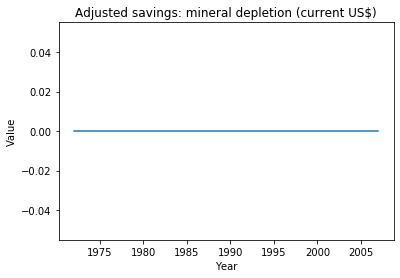

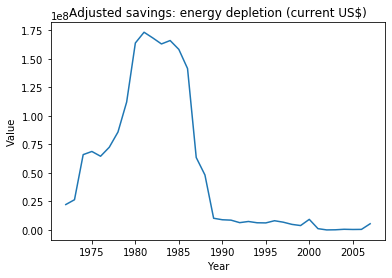

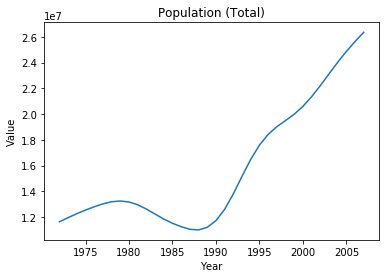

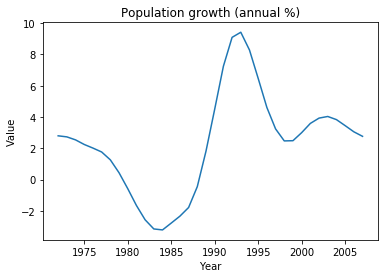

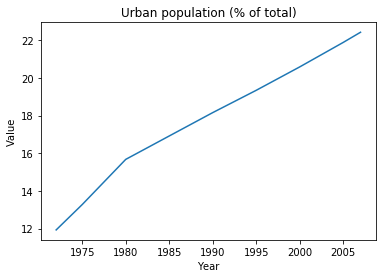

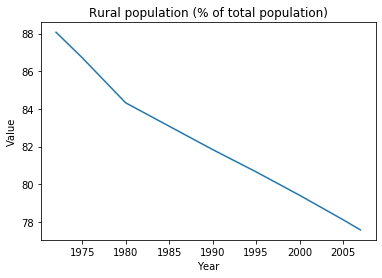

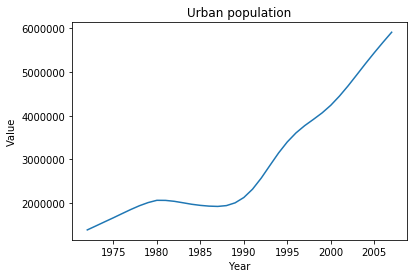

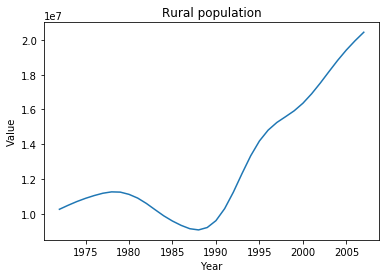

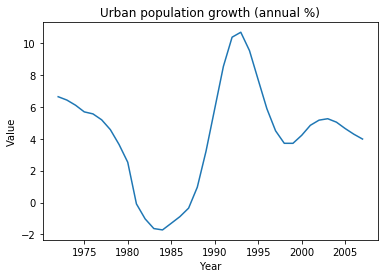

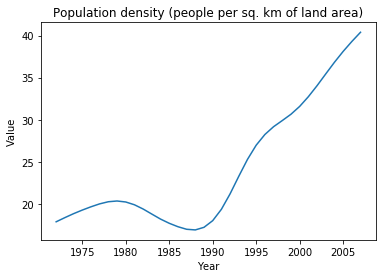

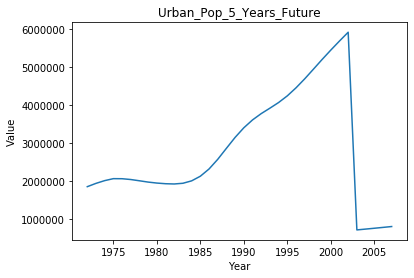

In [47]:
counter = 0

for series_name in cols[2:]:
    _ = plt.plot(final_10_df_clean[final_10_df_clean['country'] == 'Afghanistan']['year'], 
             final_10_df_clean[final_10_df_clean['country'] == 'Afghanistan'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()


In [48]:
# chart for Afghanistan
up_afg = final_10_df_clean[final_10_df_clean['country'] == 'Afghanistan'][['year','Urban population']]
up_afg.head()

series,year,Urban population
0,1972,1389151.0
1,1973,1481339.0
2,1974,1574530.0
3,1975,1666627.0
4,1976,1761884.0


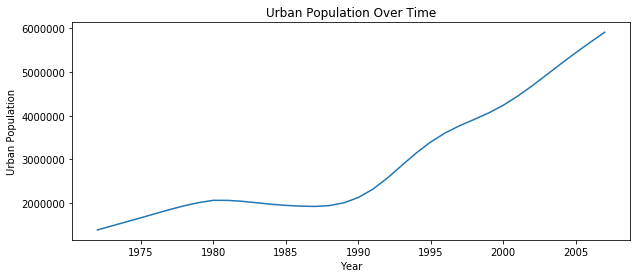

In [49]:
plt.figure(figsize=(10,4))
_ = plt.plot(final_10_df_clean[final_10_df_clean['country'] == 'Afghanistan']['year'], 
             final_10_df_clean[final_10_df_clean['country'] == 'Afghanistan']['Urban population'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Urban Population')
_ = plt.title('Urban Population Over Time')
plt.show()

In [52]:
# Save the clean dataframe to a csv for the next part of the project
final_10_df_clean.to_csv('Cleaned_Training_Set.csv')